In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
print(pd.__version__)

2.2.3


In [2]:
import os
import sys
sys.path.append(os.path.abspath('..'))

In [3]:
import importlib

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from scripts.data_cleaner import MergeData, DataCleaner
from scripts.sales_analyzer import AnalyzeSales

In [6]:
train = pd.read_csv('../data/train.csv')
store = pd.read_csv('../data/store.csv')

C:\Users\Temp\AppData\Local\Temp\ipykernel_5780\4041586168.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('../data/train.csv')


In [7]:
data = MergeData(train, store)
dff = data.merge_and_load()

c:\Users\Temp\Desktop\KAI-Projects\Sales-forcasting-using-DeepLearning\scripts\data_cleaner.py:20: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


In [8]:
dff.to_csv('../data/merged_data1.csv')


In [9]:
df = pd.read_csv('../data/merged_data1.csv')

C:\Users\Temp\AppData\Local\Temp\ipykernel_5780\118167248.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/merged_data1.csv')


In [10]:
clean = DataCleaner(df)
columns = ['CompetitionDistance', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear','PromoInterval' ]
cleaned_df = clean.fillna_with_previos_value(columns)

2025-01-03 17:12:38,014 - INFO -  filling Na values with previos one started...
c:\Users\Temp\Desktop\KAI-Projects\Sales-forcasting-using-DeepLearning\scripts\data_cleaner.py:33: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.data[col] = self.data[col].fillna(method='ffill')
2025-01-03 17:12:38,176 - INFO - filling Na values completed. 


In [11]:
cleaned_df.to_csv('../data/cleaned_data.csv')

In [12]:
df = pd.read_csv('../data/cleaned_data.csv')
df['Date'] = pd.to_datetime(df['Date'], errors= 'coerce')
df.set_index('Date', inplace=True)



C:\Users\Temp\AppData\Local\Temp\ipykernel_5780\1448577288.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/cleaned_data.csv')


In [21]:
df['StateHoliday'] = df['StateHoliday'].astype(bool)
df['SchoolHoliday'] = df['SchoolHoliday'].astype(bool)
df['Open'] = df['Open'].astype(bool)

In [30]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,IsHoliday
Date,,,,,,,,,,,,,,,,,,,,
2015-07-31,0,0,1,5,5263,555,True,1,False,True,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,False
2015-07-31,1,1,2,5,6064,625,True,1,False,True,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",False
2015-07-31,2,2,3,5,8314,821,True,1,False,True,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",False
2015-07-31,3,3,4,5,13995,1498,True,1,False,True,c,c,620.0,9.0,2009.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",False
2015-07-31,4,4,5,5,4822,559,True,1,False,True,a,a,29910.0,4.0,2015.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",False


<Axes: xlabel='Assortment'>

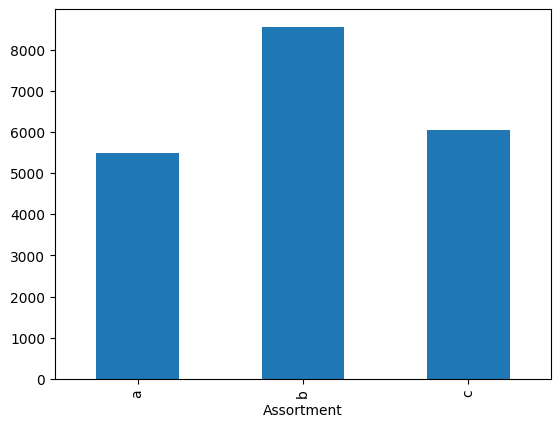

In [31]:


a = df.groupby('Assortment')['Sales'].mean()
a.plot(kind = 'bar')

2025-01-03 17:13:01,442 - INFO - plotting for holiday effects


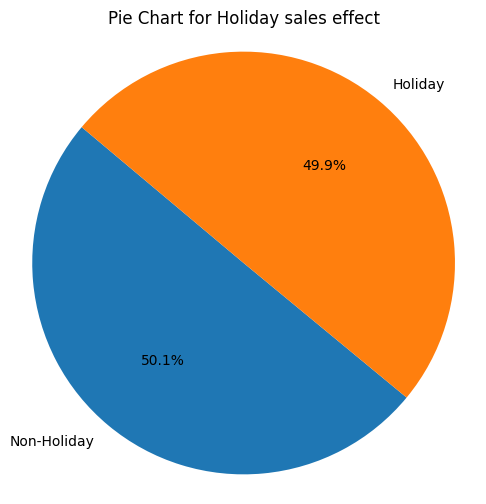

In [15]:
sales = AnalyzeSales(df)
sales.plot_holiday_effect()

2025-01-03 17:13:53,589 - INFO - Plotting weekly sales...


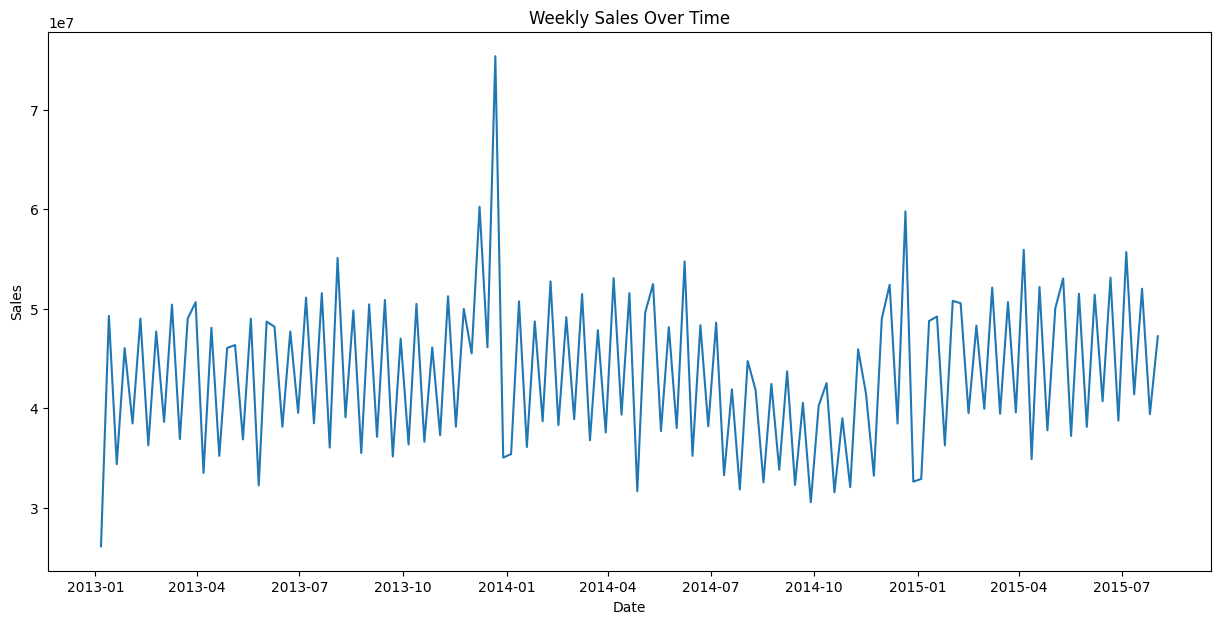

In [17]:
sales.plot_weekly_sales()

0.14.4
